# Modelling toolbox: ODE

*17th September 2024* - **Credits:** Luca Ciandrini (luca.ciandrini@umontpellier.fr)

---
## aims
- Understand, formulate and analyse mathematical models based on ODEs, with basic analytical tools and numerically.
- Grasp the difference between deterministic and stochastic processes and being able to describe the notion of noise.

Today we are going to learn how to build up a simple model (for gene expression) with Ordinary Differential Equations (ODE). The tools that we will see can be exploited in many different contexts.

Sketch a model based on ODE, simple solving techniques. Solve your system of equations with Python.


### 1-resources
- 3blue1brown on Differential equations, Chapter 1: https://www.3blue1brown.com/lessons/differential-equations 
- Strogatz, S. H. (2018). *Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering.* United States: CRC Press. The first chapter is available [here](https://www.google.fr/books/edition/Nonlinear_Dynamics_and_Chaos/1kpnDwAAQBAJ?hl=en&gbpv=1&printsec=frontcover).
- Stroagtz's lectures. [25 video-lectures](https://youtube.com/playlist?list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&si=r2DtHHlgo-6bNvD7) by Strogatz, who largely follows his book (see above).

## Tutorial
A **differential equation** is an equation that relates one or more unknown functions $\mathbf{x}$ and their derivatives.

An **ODE** is a differential equation containing one (or more) functions of **one** independent variable (for instance time $t$) and the derivatives of those functions.

For instance, Newton's second law of motion is an example of ordinary differential equation. It gives the relationship between the (second) derivatative of the displacement $x$ (a function of the intendependent variable $t$) and the force $F$ (which is itself a function of the position). In one dimension:
$$
{\displaystyle m{\frac {\mathrm {d} ^{2}x(t)}{\mathrm {d} t^{2}}}=F(x(t))\,.}
$$


More in general, we can write an Ordinary Differential Equations as:
$$
\boxed{\frac{d}{dt} \mathbf{x}(t) = \mathbf{f}(\mathbf{x}(t)) \,}
$$
and we can guess the solution with a few simple examples. 


### Discussion/questionnaire
After reading 
**[Wil]** D.J. Wilkinson, *Stochastic modelling for quantitative description of heterogeneous biological systems*, Nature Reviews (2009) [doi:10.1038/nrg2509](doi:10.1038/nrg2509):
- Discuss deteministic *vs* stochastic model;
- Name a few approaches and explain them;

---

If we have time today we will also tackle a problem that cannot be studied with deterministic approaches because of its intrinsic stochastic behaviour: the partition problem. We look at the *fluctuations* in the partition of $N$ molecules from a mother in the two daughter cells, and we related that result to experimental outcomes.

For next time you should also read 
- Theriot, J., Kondev, J., Garcia, H., Phillips, R. (2012). *Physical Biology of the Cell*. United Kingdom: CRC Press. Pages 43-48, available [here](https://www.google.fr/books/edition/Physical_Biology_of_the_Cell/t2SzDwAAQBAJ?hl=en&gbpv=1&printsec=frontcover)




### Deterministic modelling

#### Step 1. Guess an analytical solution

Let's start with the example from [Wil]:
$$
\frac{d X}{dt} = \alpha - \mu X \,.
$$

- How can you solve it analytically?


...
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

You should find 
$$
X(t) = \frac{\alpha}{\mu}(1-e^{-\mu t}) \,.
$$
- What can you say about that?


...
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
Let's plot it now.

In [19]:
import matplotlib.pyplot as plt ## matplotlib is a module for plotting in python
import numpy as np

alpha = 1
mu = 0.1 ## What units are these constants?

t = np.arange(0,100,.1) ## In array you have the indipendent variable t
print(t)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

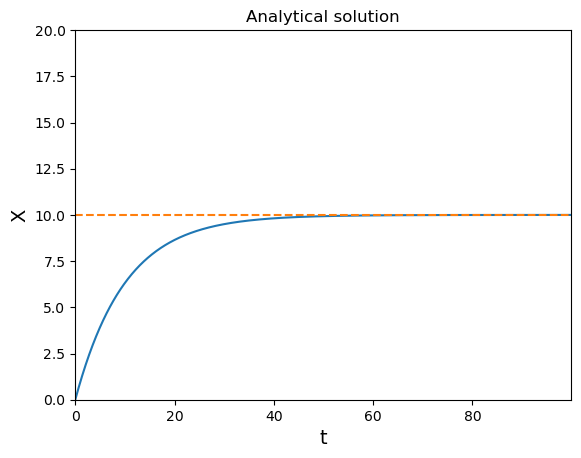

In [20]:
X = (alpha/mu)*(1.-np.exp(-mu*t))  ## In this array you are going to put your values of X computed with the solution you found.
plt.plot(t,X)

const = alpha/mu 
plt.plot([0.,t[-1]], [const, const], '--')

plt.ylim(0.,20.)
plt.xlim(0.,t[-1])
plt.xlabel('t', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.title('Analytical solution')
plt.show()

- Discuss the *steady state*.

#### Step 2. Numerical solution
Numerical solvers solve differential equations in an iterative fashion, starting from the initial conditions. Numerically, the derivative can be approximated using *finite differences*.

Let $\Delta t$ be a very small step, then
$$
\mathbf{f}(\mathbf{x}(t)) \simeq \cfrac{\mathbf{x}(t+\Delta t) - \mathbf{x}(t)}{\Delta t}
$$
so $\mathbf{x}(t+\Delta t) \simeq \mathbf{x}(t) + \mathbf{f}(\mathbf{x}(t)) \Delta t$, at the foundations of the Euler method 
$$
\mathbf{x}_{i+1} = \mathbf{x}_i + \mathbf{f}(\mathbf{x}_i)\Delta t.
$$

Let's try to develop this simple integration method.

In [21]:
#function that takes a(alpha), b (mu) and z (x) as inputs
def f(a,b,z):
    return a - b*z

In [24]:
delta = 0.01 # definition of Delta t
t_max = 100  # Maximal length of integration - final time

x_num = []   # We will build here the numerical solution
t_num = []   # and here the time steps

# Set the initial conditions:
time = 0.
t_num.append(0.)
x_num.append(0.)

while (time < t_max):
    time += delta
    t_num.append(time)
    x_prev = x_num[-1]
    x_next = x_prev + f(alpha, mu, x_prev)*delta
    x_num.append(x_next)

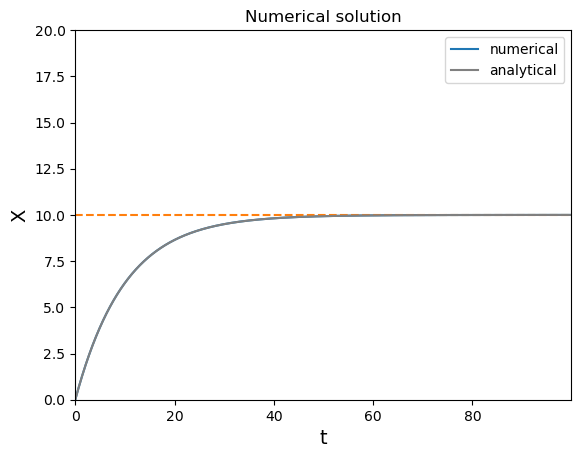

In [25]:
plt.plot(t_num,x_num, label='numerical')

plt.plot([0.,t[-1]], [const, const], '--')

plt.plot(t,X, 'gray', label='analytical') 


plt.ylim(0.,20.)
plt.xlim(0.,t[-1])
plt.xlabel('t', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.title('Numerical solution')
plt.legend()
plt.show()

---
- What could be the problems of this method?
- Try to change the $\Delta t$

You should use already developed packages for numerical integrations. For instance:
[Scipy integrate](https://docs.scipy.org/doc/scipy/reference/reference/integrate.html)
```
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
```

In [26]:
from scipy.integrate import solve_ivp

def func(t, x, a, b): return a - b*x

#sol = solve_ivp(func, [0, 100], [0.], args=[alpha, mu])
sol = solve_ivp(func, [0, 100], [0.], args=[alpha, mu], t_eval=t)
#sol = solve_ivp(func, [0, 100], [0.], args=[alpha, mu], method='LSODA')


In [27]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  9.980e+01  9.990e+01]
        y: [[ 0.000e+00  9.950e-02 ...  9.999e+00  9.999e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0

In [13]:
sol.t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [14]:
sol.y

array([[0.        , 0.09950166, 0.19801327, 0.29554468, 0.39210564,
        0.48770579, 0.5823547 , 0.67606183, 0.76883655, 0.86068815,
        0.95162582, 1.04165864, 1.1307975 , 1.21905378, 1.30643573,
        1.39295152, 1.47860928, 1.56341707, 1.64738291, 1.73051475,
        1.8128205 , 1.89430802, 1.9749851 , 2.0548595 , 2.1339389 ,
        2.21223095, 2.28974324, 2.36648329, 2.44245859, 2.51767657,
        2.5921446 , 2.66587   , 2.73886004, 2.81112194, 2.88266285,
        2.95348988, 3.0236101 , 3.09303049, 3.16175801, 3.22979956,
        3.29716196, 3.36385203, 3.42987648, 3.495242  , 3.55995522,
        3.62402271, 3.68745101, 3.75024657, 3.81241581, 3.87396509,
        3.93490073, 3.99522898, 4.05495604, 4.11408806, 4.17263114,
        4.23059132, 4.28797459, 4.34478688, 4.40103409, 4.45672204,
        4.5118565 , 4.56644321, 4.62048782, 4.67399597, 4.7269732 ,
        4.77942504, 4.83135693, 4.88277429, 4.93368246, 4.98408674,
        5.03399238, 5.08340485, 5.13233206, 5.18

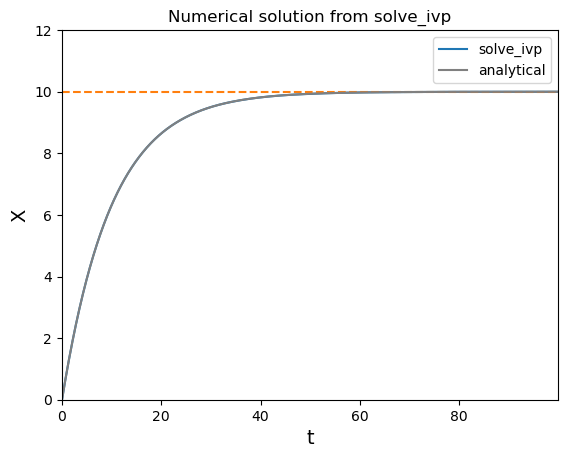

In [28]:
plt.plot(sol.t, sol.y[0], label='solve_ivp')

plt.plot([0.,t[-1]], [const, const], '--')

plt.plot(t,X, 'gray', label='analytical') 


plt.ylim(0.,12.)
plt.xlim(0.,t[-1])
plt.xlabel('t', fontsize = 14)
plt.ylabel('X', fontsize = 14)
plt.title('Numerical solution from solve_ivp')
plt.legend()
plt.show()

### Advanced: Enzyme reaction and Michaelis-Menten kinetics
Now let's give a look at the system of ODEs you would write to study Enzyme Reaction kinetics, and the Michaelis-Menten approximation.

Let's first define the set of ODEs for
$$
S + E \rightleftharpoons C \rightarrow P + E 
$$
with $k_1$ adn $k_2$ the rate constants (forward and backward respectively) for the first step, $k_3$ for the second. Concentrations are indicated with the lower case letters $s,e,c,p$.

In [29]:
def enzymatic_reaction(t, y, k1, k2, k3):
    s, e, c, p = y
    return [-k1*s*e + k2*c, -k1*s*e + k2*c + k3*c, k1*s*e - k2*c - k3*c, k3*c]

In [69]:
k1 = 1.
k2 = 0.1
k3 = 1

e_tot = 1.
s0 = 1.

sol = solve_ivp(enzymatic_reaction, [0, 10], [s0, e_tot, 0., 0.], args=[k1, k2, k3], method='LSODA')


In [70]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.162e-05 ...  9.835e+00  1.000e+01]
        y: [[ 1.000e+00  1.000e+00 ...  7.938e-04  7.031e-04]
            [ 1.000e+00  1.000e+00 ...  9.979e-01  9.982e-01]
            [ 0.000e+00  3.162e-05 ...  2.077e-03  1.844e-03]
            [ 0.000e+00  9.999e-10 ...  9.971e-01  9.975e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 91
     njev: 0
      nlu: 0

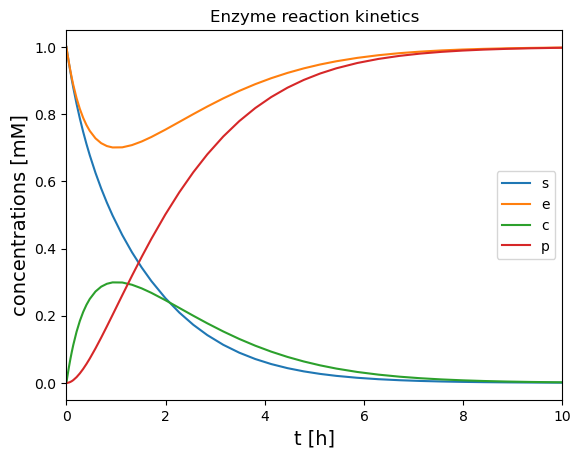

In [71]:
plt.plot(sol.t, sol.y[0], label='s')
plt.plot(sol.t, sol.y[1], label='e')
plt.plot(sol.t, sol.y[2], label='c')
plt.plot(sol.t, sol.y[3], label='p')

#plt.ylim(0.,12.)
plt.xlim(0.,sol.t[-1])
plt.xlabel('t [h]', fontsize = 14)
plt.ylabel('concentrations [mM]', fontsize = 14)
plt.title('Enzyme reaction kinetics')
plt.legend()
plt.show()

Then we can check whether the hypotheses of the Michaelis-Menten (MM) approximation are satisfied in this case or not, and compute $p$ starting from the MM formula:
$$
\frac{dp}{dt} = k_3 \frac{e_\text{tot}s}{\frac{k_2}{k_1}+s} \,.
$$

In [72]:
def mm_product(k1, k2, k3, e_tot, s):
    return k3*e_tot*s/(k2/k1+s)

In [73]:
p_mm = []   # We will build here the numerical solution for the mm

# Set the initial conditions:
p_mm.append(0.)
t_prev = 0.
for t, substrate in zip(sol.t, sol.y[0]):
    p_prev = p_mm[-1]
    delta = t - t_prev
    p_next = p_prev + mm_product(k1, k2, k3, e_tot, substrate)*delta
    t_prev = t
    if delta >0:
        #if p_next > 1:
        #    p_next = 1
        p_mm.append(p_next)
        

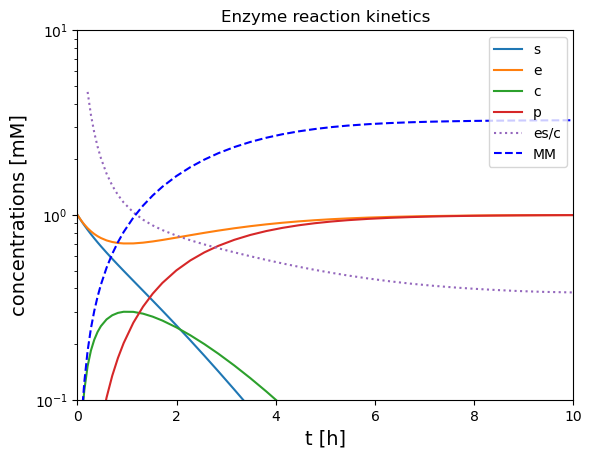

In [74]:
plt.plot(sol.t, sol.y[0], label='s')
plt.plot(sol.t, sol.y[1], label='e')
plt.plot(sol.t, sol.y[2], label='c')
plt.plot(sol.t, sol.y[3], label='p')
plt.plot(sol.t[10:], (sol.y[0][10:]*sol.y[1][10:]/sol.y[2][10:]), ':', label='es/c')

plt.plot(sol.t, p_mm,'b--', label='MM')

plt.ylim(0.1,10)
plt.semilogy()
plt.xlim(0.,sol.t[-1])
plt.xlabel('t [h]', fontsize = 14)
plt.ylabel('concentrations [mM]', fontsize = 14)
plt.title('Enzyme reaction kinetics')
plt.legend()
plt.show()